In [3]:
#Python Warning off
import warnings
warnings.filterwarnings('ignore')

#TF warning off
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [1]:
#성적 프로그램 
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats #통계 


C:\Users\User\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\User\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\User\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\User\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
df = pd.read_csv('datasets/score.csv')
df

,반,이름,국어,영어,수학,과학
0,1,성춘향,67,87,90,98
1,1,이몽룡,45,45,56,98
2,1,향단이,95,59,96,88
3,1,방자,65,94,89,98
4,1,월매,45,65,78,98
5,1,변학도,78,76,98,89
6,2,홍길동,87,67,65,56
7,2,임꺽정,89,98,78,78
8,2,전우치,100,78,56,65
9,2,일지매,99,89,87,87


In [7]:
subjects=['국어','영어','수학','과학']

In [8]:
df['총점']=df[subjects].sum(axis=1) #subjects 자리에 list가 들어감
df

,반,이름,국어,영어,수학,과학,총점
0,1,성춘향,67,87,90,98,342
1,1,이몽룡,45,45,56,98,244
2,1,향단이,95,59,96,88,338
3,1,방자,65,94,89,98,346
4,1,월매,45,65,78,98,286
5,1,변학도,78,76,98,89,341
6,2,홍길동,87,67,65,56,275
7,2,임꺽정,89,98,78,78,343
8,2,전우치,100,78,56,65,299
9,2,일지매,99,89,87,87,362


In [11]:
 df['평균'] = df['총점']/len(subjects) #과목 리스트만 수정해주면 평균도 바뀜
df

,반,이름,국어,영어,수학,과학,총점,평균
0,1,성춘향,67,87,90,98,342,85.50
1,1,이몽룡,45,45,56,98,244,61.00
2,1,향단이,95,59,96,88,338,84.50
3,1,방자,65,94,89,98,346,86.50
4,1,월매,45,65,78,98,286,71.50
5,1,변학도,78,76,98,89,341,85.25
6,2,홍길동,87,67,65,56,275,68.75
7,2,임꺽정,89,98,78,78,343,85.75
8,2,전우치,100,78,56,65,299,74.75
9,2,일지매,99,89,87,87,362,90.50


In [18]:
df2=df.sort_values(['평균','이름'], ascending = [False,True] ) #ascending True면 오름차순(작은것 부터)
#평균으로 내림차순, 이름으로 오름차순
df2

,반,이름,국어,영어,수학,과학,총점,평균
9,2,일지매,99,89,87,87,362,90.50
3,1,방자,65,94,89,98,346,86.50
7,2,임꺽정,89,98,78,78,343,85.75
0,1,성춘향,67,87,90,98,342,85.50
5,1,변학도,78,76,98,89,341,85.25
2,1,향단이,95,59,96,88,338,84.50
11,2,콩쥐,65,89,87,78,319,79.75
8,2,전우치,100,78,56,65,299,74.75
4,1,월매,45,65,78,98,286,71.50
6,2,홍길동,87,67,65,56,275,68.75


In [23]:
#matplotlib에서 한글이 깨지면 안되니까 이걸 설정함.
import platform 
platform.system()

'Windows'

In [25]:
import platform 
import matplotlib
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': #Mac
    matplotlib.rc('font',family='AppleGothic')
else: matplotlib.rc('font', family='NanumGothic') #linux
    
plt.rcParams['axes.unicode_minus'] = False #마이너스 기호 깨짐 방지

In [27]:
sorted_df = df.sort_values(['평균'], ascending=[False])

In [29]:
sorted_df.index = sorted_df['이름']

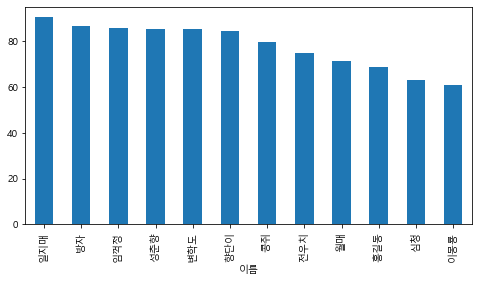

In [34]:
sorted_df['평균'].plot(kind='bar',figsize=(8,4))

In [36]:
#정렬한 데이터 프레임을 excel 파일에 저장
sorted_df.to_excel('sorted_score.xlsx')

In [44]:
class_1 = df[ df['반'] == 1] #반이 1반인 학생만 모아서 저장 
class_1

,반,이름,국어,영어,수학,과학,총점,평균
0,1,성춘향,67,87,90,98,342,85.50
1,1,이몽룡,45,45,56,98,244,61.00
2,1,향단이,95,59,96,88,338,84.50
3,1,방자,65,94,89,98,346,86.50
4,1,월매,45,65,78,98,286,71.50
5,1,변학도,78,76,98,89,341,85.25


In [45]:
class_2 = df[ df['반'] == 2] #반이 1반인 학생만 모아서 저장 
class_2

,반,이름,국어,영어,수학,과학,총점,평균
6,2,홍길동,87,67,65,56,275,68.75
7,2,임꺽정,89,98,78,78,343,85.75
8,2,전우치,100,78,56,65,299,74.75
9,2,일지매,99,89,87,87,362,90.50
10,2,심청,98,45,56,54,253,63.25
11,2,콩쥐,65,89,87,78,319,79.75


In [50]:
class_1_average= class_1['평균'].sum()/len(class_1)
class_1_average

79.04166666666667

In [52]:
class_2_average= class_2['평균'].sum()/len(class_2)
class_2_average

77.125

In [59]:
stats.ttest_ind(class_1['평균'],class_2['평균'])
# pvalue= 0.755583336185639 , 기준 = 0.05


Ttest_indResult(statistic=0.319960228209846, pvalue=0.755583336185639)

In [61]:
for subject in subjects:
    print(stats.ttest_ind(class_1[subject], class_2[subject]))
    
"""
Ttest_indResult(statistic=-2.490140665442242, pvalue=0.031982494983816424) 얘랑 (국어)
Ttest_indResult(statistic=-0.6156907152631581, pvalue=0.5518533781528807)
Ttest_indResult(statistic=1.4961318778859336, pvalue=0.1654958420079056)
Ttest_indResult(statistic=4.328442555331755, pvalue=0.0014931977711732465) 얘(과학)는 의미가 있네. (0.05 이하)
"""

Ttest_indResult(statistic=-2.490140665442242, pvalue=0.031982494983816424)
Ttest_indResult(statistic=-0.6156907152631581, pvalue=0.5518533781528807)
Ttest_indResult(statistic=1.4961318778859336, pvalue=0.1654958420079056)
Ttest_indResult(statistic=4.328442555331755, pvalue=0.0014931977711732465)


'\nTtest_indResult(statistic=-2.490140665442242, pvalue=0.031982494983816424) 얘랑 (국어)\nTtest_indResult(statistic=-0.6156907152631581, pvalue=0.5518533781528807)\nTtest_indResult(statistic=1.4961318778859336, pvalue=0.1654958420079056)\nTtest_indResult(statistic=4.328442555331755, pvalue=0.0014931977711732465) 얘(과학)는 의미가 있네. (0.05 이하)\n'

In [62]:
class_1['과학'].sum()/6 , class_2['과학'].sum()/6

(94.83333333333333, 69.66666666666667)

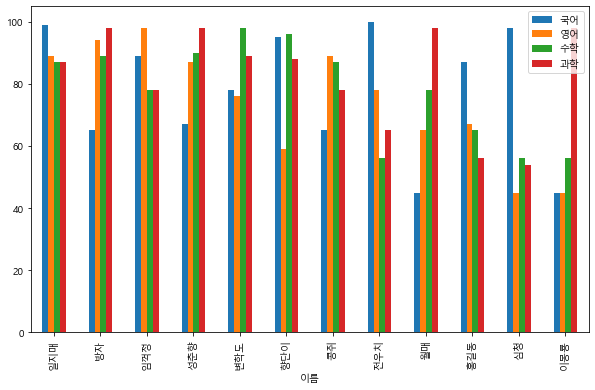

In [63]:
sorted_df[subjects].plot(kind='bar',figsize=(10,6))

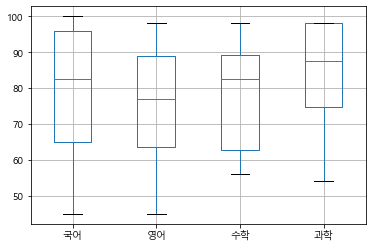

In [64]:
df[subjects].boxplot()

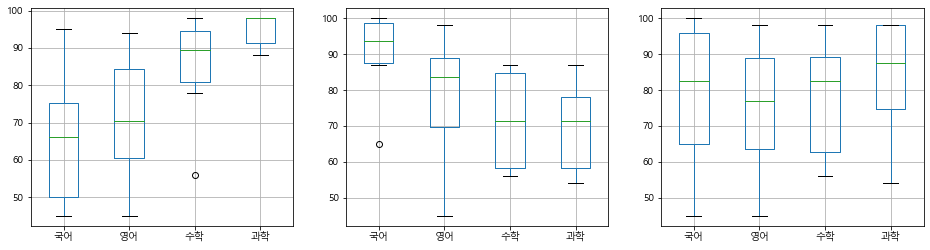

In [72]:
plt.figure(figsize=[16,4])

plt.subplot(131)
class_1[subjects].boxplot()

plt.subplot(132)
class_2[subjects].boxplot()

plt.subplot(133)
df[subjects].boxplot()

In [73]:
stats.pearsonr(df['수학'], df['과학'])# 뒤에 나오는 값이 p 밸류, 0.05 정도라 차이 애매함

(0.5632890597067751, 0.056505804861555285)

In [74]:
stats.pearsonr(df['국어'], df['영어']) # 뒤에 나오는 값이 p 밸류, 차이 없음

(0.10566562777974003, 0.7437959551857833)

In [75]:
stats.pearsonr(df['국어'], df['과학']) #차이 큼

(-0.6641304447132412, 0.018501959139425324)

In [77]:
############################################################

In [76]:
#pandas

In [78]:
import pandas as pd
pd.__version__

'1.0.1'

In [81]:
s = pd.Series([1,2,3,4])
s
#left one is index and value is on the right side. 

0    1
1    2
2    3
3    4
dtype: int64

In [83]:
s[ [1,3] ]

1    2
3    4
dtype: int64

In [87]:
s = pd.Series([1,2,3,4] , index=['a','b','c','d'])
s

a    1
b    2
c    3
d    4
dtype: int64

In [96]:
s[['a','d']]

a    1
d    4
dtype: int64

In [98]:
temp_df = pd.DataFrame(
    {
        'name':['hong','jang','im'], # key
        'age':[25,35,45]} # value
) 
temp_df

,name,age
0,hong,25
1,jang,35
2,im,45


In [99]:
s1 = temp_df['name']
print(type(s1))
s1

<class 'pandas.core.series.Series'>


0    hong
1    jang
2      im
Name: name, dtype: object

In [101]:
len(s1)

3

In [102]:
s1.size

3

In [104]:
s1.shape

(3,)

In [ ]:
# 1. 함수형 언어 : 모든 것의 중심이 함수에 있음. 예를 들어 add 라는 함수가 잇으면 여기 a랑 b 가 들어가서 return a+b 요런식으로 사용하는게 함수입.
#영어로 얘기하면 명령어. 
# 2. 객체지향 언어 :

In [105]:
temp_df['age'].sum()

105

In [108]:
import seaborn as sns

In [110]:
anscombe = sns.load_dataset("anscombe")
anscombe

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [111]:
%matplotlib inline
import matplotlib.pyplot as plt


In [113]:
dataset_1 = anscombe[ anscombe['dataset'] == 'I']
dataset_1

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [125]:
dataset_2 = anscombe[ anscombe['dataset'] == 'II']
dataset_3 = anscombe[ anscombe['dataset'] == 'III']
dataset_4 = anscombe[ anscombe['dataset'] == 'IV']

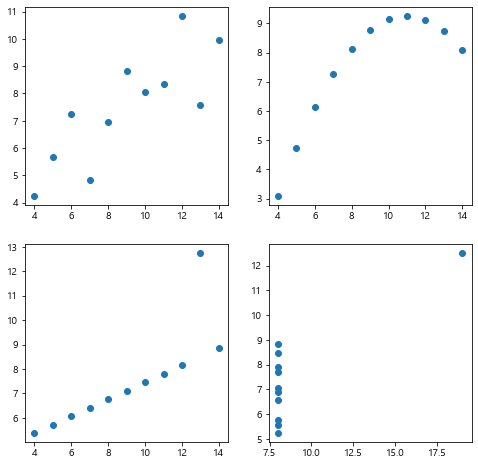

In [126]:
plt.figure(figsize=(8,8))

plt.subplot(221)
plt.plot(dataset_1['x'], dataset_1['y'],'o')

plt.subplot(222)
plt.plot(dataset_2['x'], dataset_2['y'],'o')

plt.subplot(223)
plt.plot(dataset_3['x'], dataset_3['y'],'o')

plt.subplot(224)
plt.plot(dataset_4['x'], dataset_4['y'],'o')

In [130]:
dataset_2.describe(), dataset_1.describe()

(               x          y
 count  11.000000  11.000000
 mean    9.000000   7.500909
 std     3.316625   2.031657
 min     4.000000   3.100000
 25%     6.500000   6.695000
 50%     9.000000   8.140000
 75%    11.500000   8.950000
 max    14.000000   9.260000,
                x          y
 count  11.000000  11.000000
 mean    9.000000   7.500909
 std     3.316625   2.031568
 min     4.000000   4.260000
 25%     6.500000   6.315000
 50%     9.000000   7.580000
 75%    11.500000   8.570000
 max    14.000000  10.840000)

In [133]:
tips = sns.load_dataset("tips")
tips.head()
#tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


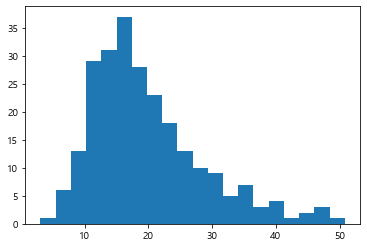

In [137]:
plt.hist(tips['total_bill'], bins=20) # 히스토그램은 연속형 데이터 표현할 때 굿
plt.show() 

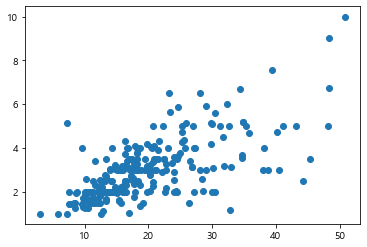

In [138]:
plt.scatter(tips['total_bill'], tips['tip']) #점을 흩뿌려 주는 녀석, 연속형 데이터 2개를 xy 축으로 

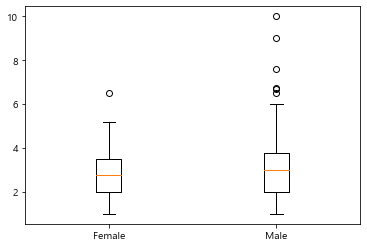

In [167]:
plt.boxplot(
    [tips[ tips['sex'] == 'Female']['tip'],
    tips[ tips['sex'] == 'Male']['tip']],
    labels=['Female','Male']
)
plt.show()

In [160]:
def recode_sex(sex):
    if sex == 'Female':
        return 0 
    else:
        return 1

In [162]:
tips['sex_color'] = tips['sex'].apply(recode_sex)
tips.head()

,total_bill,tip,sex,smoker,day,time,size,sex_color
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0


In [180]:
########################################

In [ ]:
# ['10', '20'] 과 [10, 20] 간에 왔다갔다 하기. 

In [172]:

arr = ['10','20','30']
arr2 = []
for i in arr:
    arr2.append(int(i))
arr2

[10, 20, 30]

In [178]:
arr3 = list( map(int,arr))
arr3

[10, 20, 30]

In [181]:
aarr = [10,20,30]
arr2 = []
for i in arr:
    arr2.append(str(i))
arr2

['10', '20', '30']

In [184]:
arr3 = list( map(str,arr3))
arr3

['10', '20', '30']

In [185]:
from functools import reduce

In [187]:
arr = range(1,11)
hap = reduce(lambda a,b : a+b, arr)
hap

55

In [189]:
############################

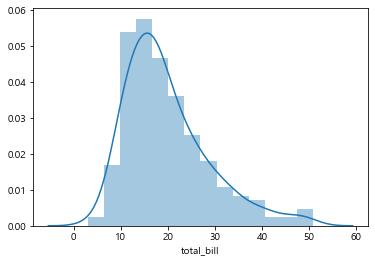

In [190]:
sns.distplot(tips['total_bill'],)

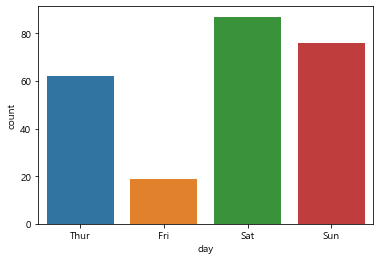

In [191]:
sns.countplot('day',data=tips)

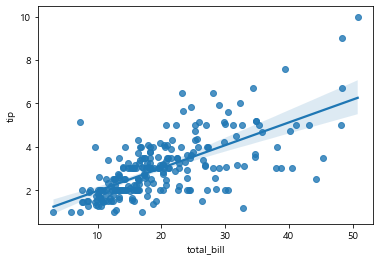

In [193]:
sns.regplot(x = 'total_bill' , y = 'tip' , data = tips)

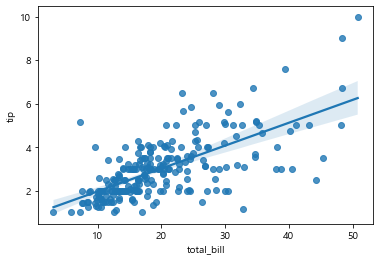

In [199]:
sns.regplot(tips['total_bill'] ,tips['tip'] )

In [195]:
sns.jointplot(x='total_bill', y='tip', data = tips)

SyntaxError: positional argument follows keyword argument (<ipython-input-195-64db76aee920>, line 1)

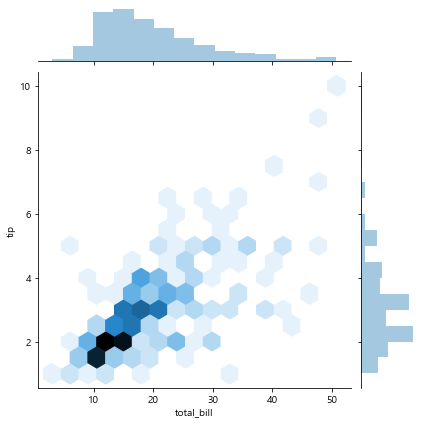

In [197]:
sns.jointplot(x='total_bill', y='tip', data = tips, kind='hex')